## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob
bob.__version__

'0.4.0'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

Step-by-step plan:
1. Import the `imread` function from the `skimage.io` module.
2. Use the `imread` function to load the "blobs.tif" image file and store it in a variable.
3. Import the `stackview` module.
4. Use the `stackview.insight` function to display the loaded image.

Code:

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
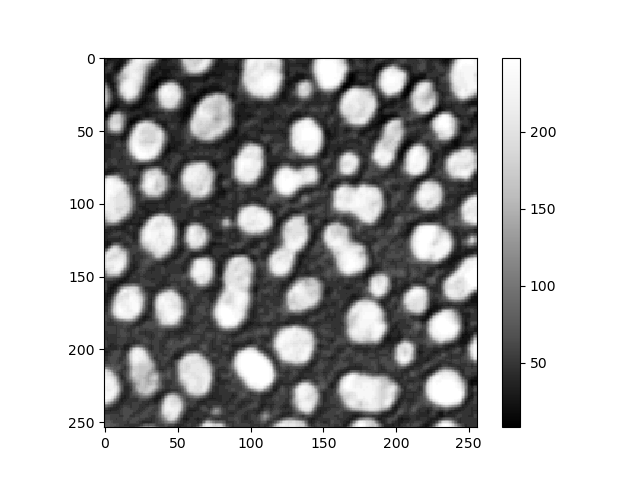
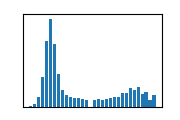

In [4]:
from skimage.io import imread
import stackview

image = imread("blobs.tif")
stackview.insight(image)

In [3]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

Step-by-step plan:
1. Import the `imread` and `imshow` functions from the `skimage.io` module.
2. Import the `filters` and `measure` modules from the `skimage` library.
3. Load the "blobs.tif" image file and convert it to grayscale using the `imread` function.
4. Apply Otsu's thresholding method to segment the nuclei-like objects using the `filters.threshold_otsu` function.
5. Use connected component labeling to label the segmented objects using the `measure.label` function.
6. Calculate the area of each labeled object using the `measure.regionprops` function and print the area on top of the respective labels using the `imshow` function.

Code:

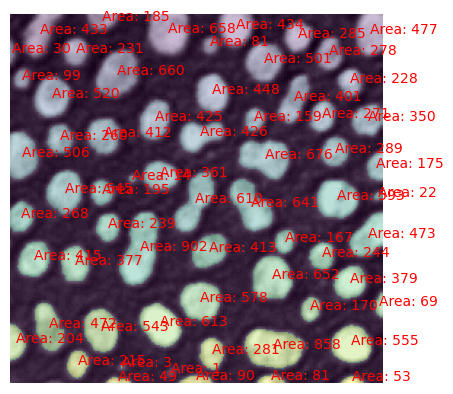

In [5]:
from skimage.io import imread
from skimage import filters, measure
import matplotlib.pyplot as plt

# Load grayscale image
image = imread("blobs.tif", as_gray=True)

# Thresholding using Otsu's method
threshold = filters.threshold_otsu(image)
binary_image = image > threshold

# Label objects
labels = measure.label(binary_image, connectivity=2)

# Calculate area and print on top of labels
props = measure.regionprops(labels)
for prop in props:
    x, y = prop.centroid
    plt.text(y, x, f"Area: {prop.area}", color='red')

# Display image with labels
plt.imshow(image, cmap='gray')
plt.imshow(labels, alpha=0.3)
plt.axis('off')
plt.show()